In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()
#dataset = pd.read_csv(r'C:\Users\janan\Downloads\archive\tripadvisor_hotel_reviews.csv')

Saving tripadvisor_hotel_reviews.csv to tripadvisor_hotel_reviews.csv


In [3]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['tripadvisor_hotel_reviews.csv']))

In [4]:
df2

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [5]:
df2.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [6]:
#check for missing values

print("No. of Missing Reviews:",df2['Review'].isnull().sum())
print("No. of Missing Ratings:",df2['Rating'].isnull().sum())


No. of Missing Reviews: 0
No. of Missing Ratings: 0


In [7]:
#tokenizing the inputs
from sklearn.feature_extraction import _stop_words
stopwords = _stop_words.ENGLISH_STOP_WORDS

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

list_of_tokenized_words = []
for word in range(0,len(df2)):
   tokens = nltk.tokenize.word_tokenize(df2['Review'][word])
   tokens = [word for word in tokens if word not in stopwords]
   tokens = [wnl.lemmatize(token) for token in tokens]
   tokens = ' '.join(tokens)
   list_of_tokenized_words.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [8]:
list_of_tokenized_words[:2]

['nice hotel expensive parking got good deal stay hotel anniversary , arrived late evening took advice previous review did valet parking , check quick easy , little disappointed non-existent view room room clean nice size , bed comfortable woke stiff neck high pillow , soundproof like heard music room night morning loud bang door opening closing hear people talking hallway , maybe just noisy neighbor , aveda bath product nice , did goldfish stay nice touch taken advantage staying longer , location great walking distance shopping , overall nice experience having pay 40 parking night ,',
 'ok special charge diamond member hilton decided chain shot 20th anniversary seattle , start booked suite paid extra website description , suite bedroom bathroom standard hotel room , took printed reservation desk showed said thing like tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast , got kidding , embassy suit sitting room bathroom bedroom unlike kimpton ca

In [9]:
#converting tokens to input vectors

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(lowercase = True)
tfidf = TfidfVectorizer(lowercase = True)

X_cv = cv.fit_transform(list_of_tokenized_words)
X_tfidf = tfidf.fit_transform(list_of_tokenized_words)

In [10]:
X_cv.shape

(20491, 49979)

In [11]:
X_tfidf.shape

(20491, 49979)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hotel Ratings Distribution')

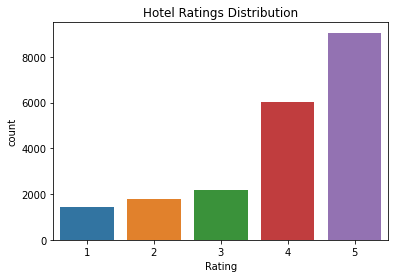

In [12]:
#Visualizing Ratings Distribution

import seaborn as sns
sns.countplot(df2['Rating'])
plt.title("Hotel Ratings Distribution")

In [13]:
#mapping ratings into 3 categories - Best, good, bad
def sentiment_analyzer(s):
  if(s>3):
    return 2
  elif(s==3):
    return 1
  else:
    return 0

In [14]:
df2['Sentiment'] = df2['Rating'].map(sentiment_analyzer)

In [15]:
Y = df2['Sentiment']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_cv, Y, test_size = 0.2, random_state = 1)

In [17]:
#Using Decison Tree Algorithm to classify
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score

In [18]:
decision_tree_count_vectorizing_accuracy = accuracy_score(y_pred, y_test)

In [19]:
decision_tree_count_vectorizing_accuracy

0.7496950475725787

In [20]:
#Using Random Forest Algorithm to classify
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score

random_forest_count_vectorizing_accuracy = accuracy_score(y_pred, y_test)

In [21]:
random_forest_count_vectorizing_accuracy

0.7987313979019273